In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
energy_data = pd.read_csv('Gen Chart_Full Data_data.csv')  # Replace 'Gen Chart_Full Data_data.csv' with the actual file path
energy_data

,Fuel Type,Date - MST,Date,Date (MPT),Date (MST),Maximum Capacity,System Available,System Capacity,System Generation,Total Generation
0,Coal,08/10/2023 00:00:00,08/10/2023,08/10/2023 03:00:00,08/10/2023 02:00:00,820,195,820.0,273.135400,272.029495
1,Coal,08/10/2023 00:00:00,08/10/2023,08/10/2023 06:00:00,08/10/2023 05:00:00,820,380,820.0,377.808000,377.586438
2,Coal,08/10/2023 00:00:00,08/10/2023,08/10/2023 23:00:00,08/10/2023 22:00:00,820,380,820.0,376.112000,375.904938
3,Coal,08/10/2023 00:00:00,08/10/2023,09/10/2023 00:00:00,08/10/2023 23:00:00,820,380,820.0,376.624000,376.397659
4,Coal,09/10/2023 00:00:00,09/10/2023,09/10/2023 01:00:00,09/10/2023 00:00:00,820,380,820.0,375.856000,375.558269
...,...,...,...,...,...,...,...,...,...,...
704013,Cogeneration,14/03/2020 00:00:00,14/03/2020,14/03/2020 23:00:00,14/03/2020 22:00:00,5093,3245,4468.5,1825.218647,4129.297851
704014,Cogeneration,19/11/2019 00:00:00,19/11/2019,19/11/2019 01:00:00,19/11/2019 01:00:00,5093,3246,4468.5,1741.144876,3953.679039
704015,Cogeneration,22/11/2019 00:00:00,22/11/2019,22/11/2019 01:00:00,22/11/2019 01:00:00,5093,3246,4468.5,1686.491223,3884.788582
704016,Cogeneration,25/12/2019 00:00:00,25/12/2019,25/12/2019 00:00:00,25/12/2019 00:00:00,5093,3246,4468.5,1681.768588,4073.727776


In [10]:
energy_data['Date (MST)'] = pd.to_datetime(energy_data['Date (MST)'], format='%d/%m/%Y %H:%M:%S')
energy_data.set_index('Date (MST)', inplace=True)

# Select 'System Generation' column as target variable for forecasting
energy_consumption = energy_data['System Generation']

# Split the data into training and testing sets
train_size = int(len(energy_consumption) * 0.8)  # 80% of data for training
train_data, test_data = energy_consumption.iloc[:train_size], energy_consumption.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q) with p=5, d=1, q=0
arima_model = model.fit()

# Forecast
forecast_values = arima_model.forecast(steps=len(test_data))[0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print('Root Mean Squared Error (RMSE):', rmse)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast using ARIMA')
plt.legend()
plt.show()

C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-

KeyError: 0

  Fuel Type           Date - MST        Date           Date (MPT)  \
0      Coal  08/10/2023 00:00:00  08/10/2023  08/10/2023 03:00:00   
1      Coal  08/10/2023 00:00:00  08/10/2023  08/10/2023 06:00:00   
2      Coal  08/10/2023 00:00:00  08/10/2023  08/10/2023 23:00:00   
3      Coal  08/10/2023 00:00:00  08/10/2023  09/10/2023 00:00:00   
4      Coal  09/10/2023 00:00:00  09/10/2023  09/10/2023 01:00:00   

            Date (MST)  Maximum Capacity  System Available  System Capacity  \
0  08/10/2023 02:00:00               820               195            820.0   
1  08/10/2023 05:00:00               820               380            820.0   
2  08/10/2023 22:00:00               820               380            820.0   
3  08/10/2023 23:00:00               820               380            820.0   
4  09/10/2023 00:00:00               820               380            820.0   

   System Generation  Total Generation  
0           273.1354        272.029495  
1           377.8080        

C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\linta\anaconda3\Lib\site-

Root Mean Squared Error (RMSE): 844.9845943843529


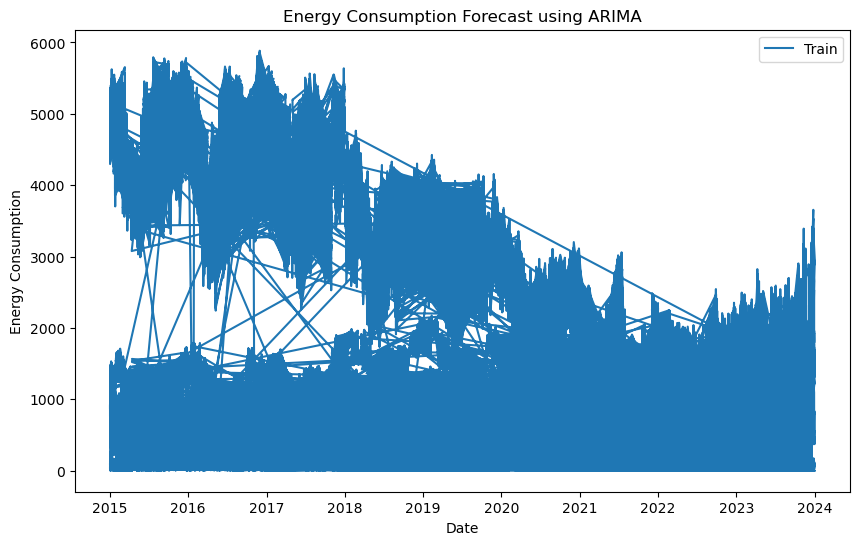

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('Gen Chart_Full Data_data.csv')  # Replace 'your_data.csv' with the actual file path

# Print the DataFrame or its column names to verify the structure
print(data.head())  # Check the first few rows
print(data.columns)  # Check column names

# Convert 'Date (MST)' column to datetime format and set as index
data['Date (MST)'] = pd.to_datetime(data['Date (MST)'], format='%d/%m/%Y %H:%M:%S')
data.set_index('Date (MST)', inplace=True)

# Select 'System Generation' column as target variable for forecasting
energy_consumption = data['System Generation']

# Split the data into training and testing sets
train_size = int(len(energy_consumption) * 0.8)  # 80% of data for training
train_data, test_data = energy_consumption.iloc[:train_size], energy_consumption.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q) with p=5, d=1, q=0
arima_model = model.fit()

# Forecast
forecast_values = arima_model.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print('Root Mean Squared Error (RMSE):', rmse)

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
#plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast using ARIMA')
plt.legend()
plt.show()



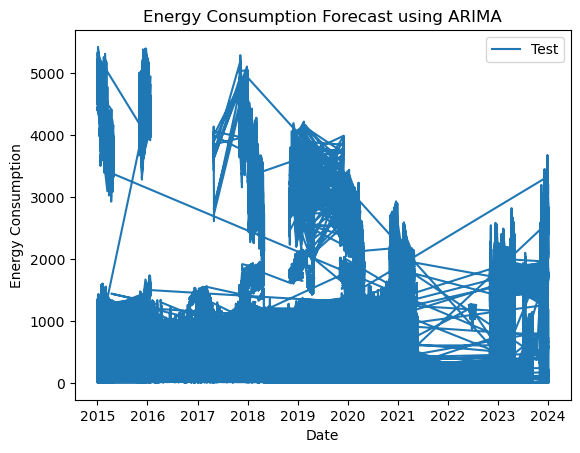

In [15]:
plt.plot(test_data.index, test_data, label='Test')
#plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast using ARIMA')
plt.legend()
plt.show()

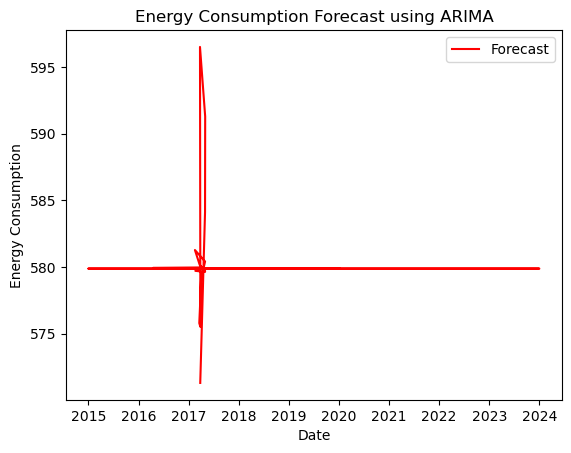

In [13]:
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast using ARIMA')
plt.legend()
plt.show()
